# Understanding GANs

In this chapter, we will introduce GANs. Just as in autoencoder networks, GANs have a generator and a discriminator network. However, GANs are fundamentally different. They represent an unsupervised learning problem, where the two networks compete, and cooperate with each other at the same time. It is important that the generator and discriminator don't overpower each other. The idea behind GANs is to generate new examples based on training data. Applications can range from generating new handwritten MNIST images to generating music. GANs have received a lot of attention lately because the results of using them are fascinating. <br><br>
To start implementing GANs, we need to. It is hard to determine the quality of examples produced by GANs. A lower loss value doesn't always represent better quality. Often, for images, the only way to determine the quality is by visually inspecting the generated examples. We can than determine whether the generated images are realistic enough, more or less like a simple Turing test. In the following example, we will introduce GANs by using the well-known MNIST dataset and the Keras framework.

In [1]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import initializers

from keras.datasets import mnist

import matplotlib.pyplot as plt

Using TensorFlow backend.


### By using Keras, we can easily import both datasets with the following lines of code:

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = X_train.shape[1:]

X_train = (X_train.reshape(-1, img_rows*img_cols, 1).astype(np.float32)-127.5)/127.5

### For our GAN, we need to define three network architectures. Let's start with discriminator_model :

In [3]:
def discriminator_model(dropout=0.5):
    model = Sequential()
    model.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(dropout))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(dropout))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

### Next, we define generator_model :

In [4]:
def generator_model():
    model = Sequential()
    model.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(784, activation='tanh'))
    opt = Adam(lr=0.00005)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

### Finally, we can create our networks and the combined network:

In [5]:
discriminator = discriminator_model()
generator = generator_model()
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output)
opt = Adam(lr=0.0001)
gan.compile(loss='binary_crossentropy', optimizer=opt)

### Before we train our GAN, we need to define a function to plot the generated images:

In [6]:
def plot_images(samples=16, step=0):
    plt.figure(figsize=(5,5))
    for i in range(samples):
        noise = np.random.uniform(-1, 1, size=[batch_size, 100])#np.random.normal(0, 1, size=[batch_size, 100])
        images = generator.predict(noise)
        plt.subplot(4, 4, i+1)
        image = images[i, :,]
        image = np.reshape(image, [img_rows, img_cols])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
    plt.show()

### We can now start training our GAN. While training our model, we will output the results:

Step 0


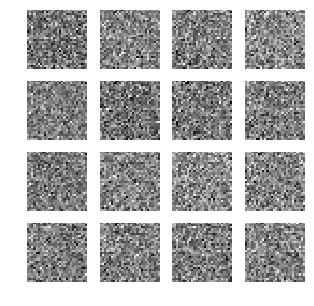

Step 1000


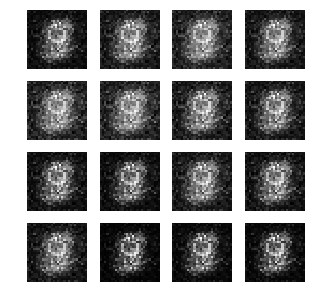

Step 2000


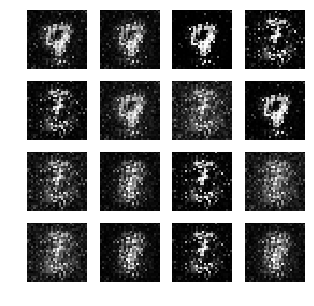

Step 3000


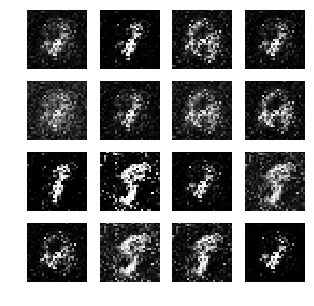

Step 4000


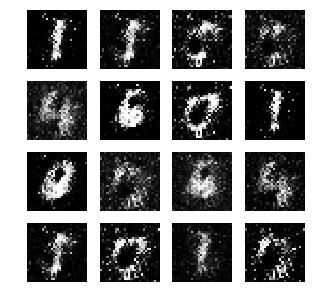

Step 5000


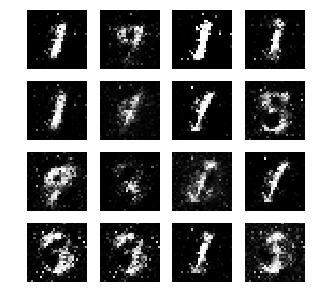

Step 6000


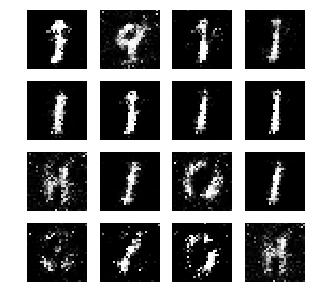

Step 7000


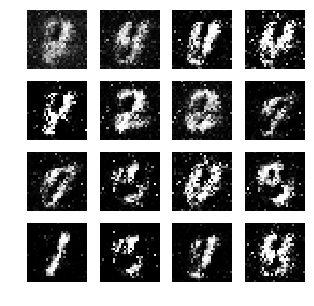

Step 8000


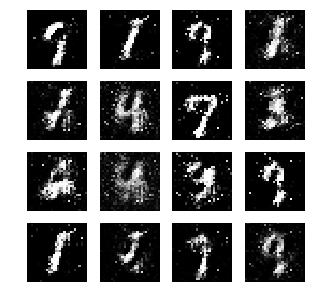

Step 9000


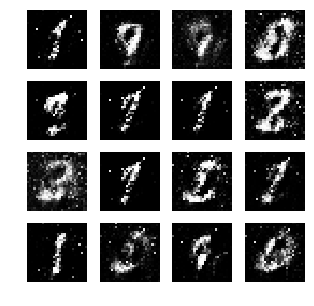

Step 10000


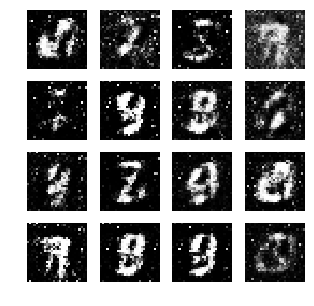

Step 11000


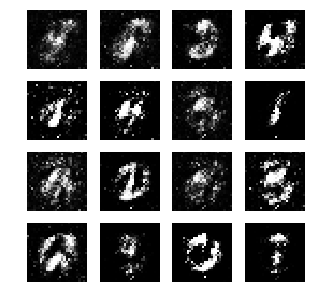

Step 12000


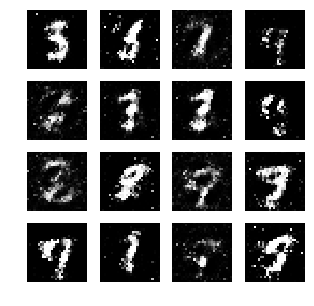

Step 13000


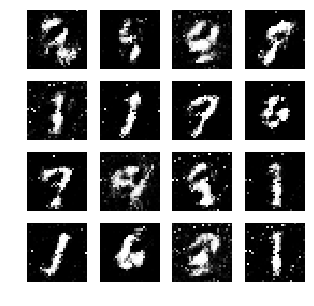

Step 14000


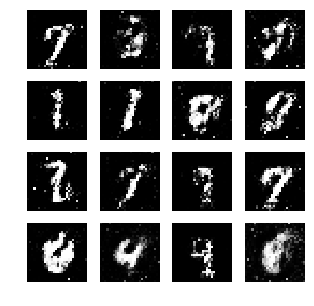

Step 15000


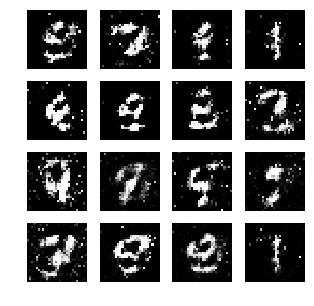

Step 16000


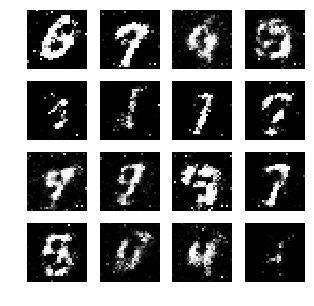

Step 17000


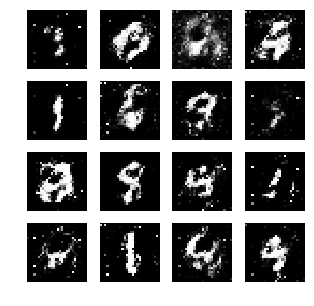

Step 18000


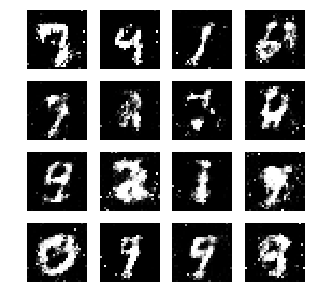

Step 19000


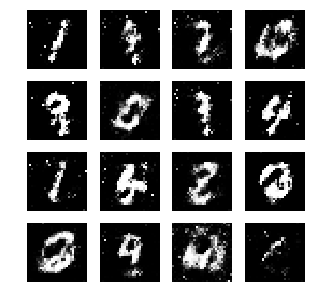

Step 20000


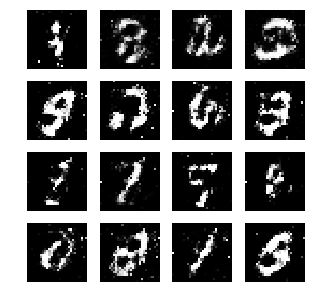

Step 21000


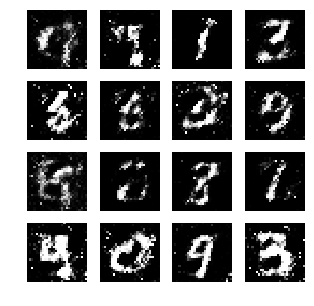

Step 22000


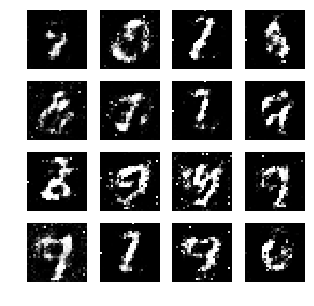

Step 23000


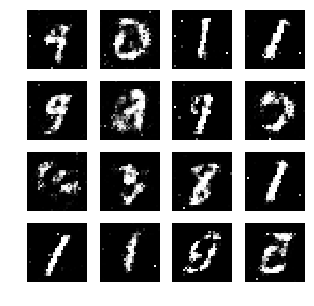

Step 24000


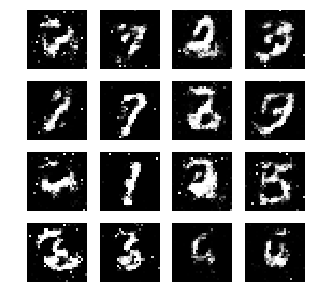

Step 25000


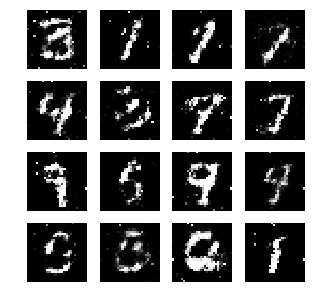

Step 26000


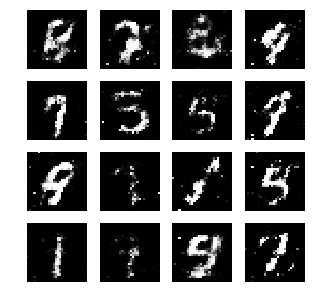

Step 27000


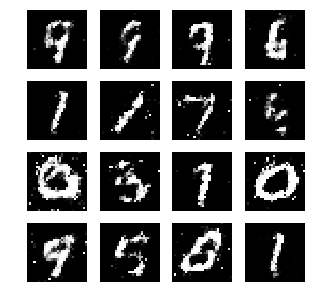

Step 28000


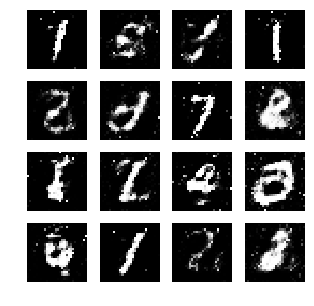

Step 29000


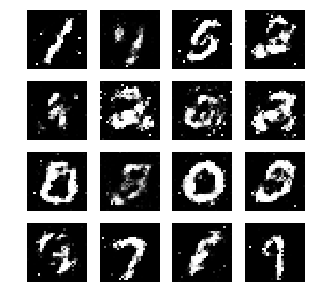

Step 30000


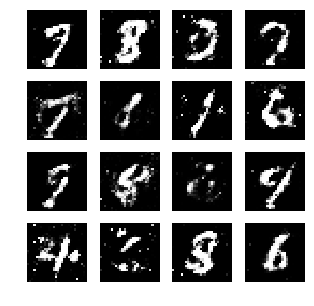

Step 31000


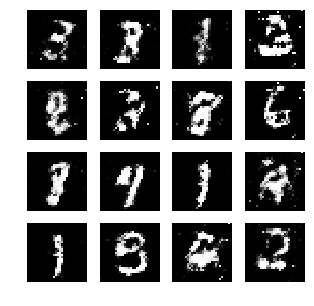

Step 32000


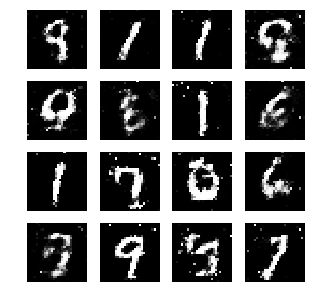

Step 33000


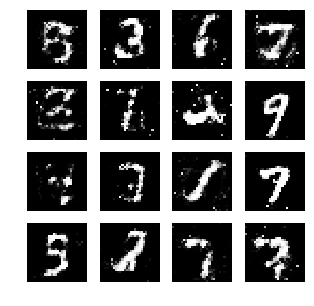

Step 34000


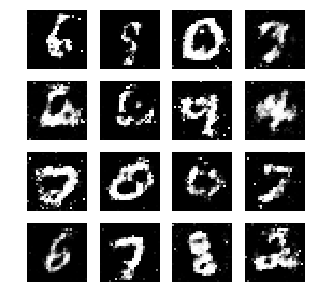

Step 35000


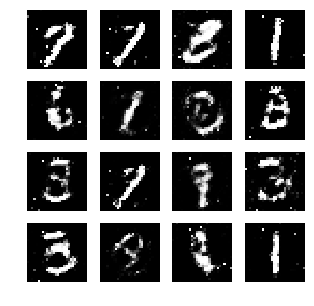

Step 36000


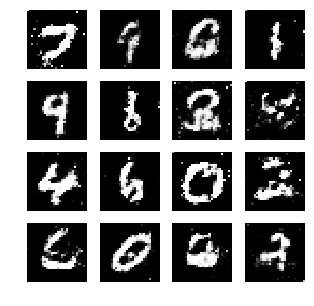

Step 37000


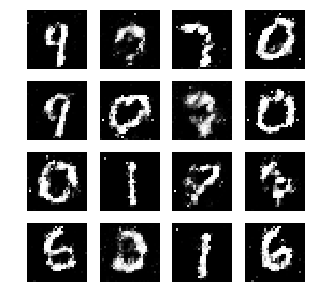

Step 38000


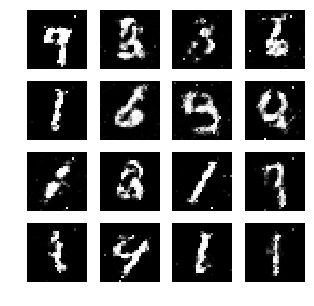

Step 39000


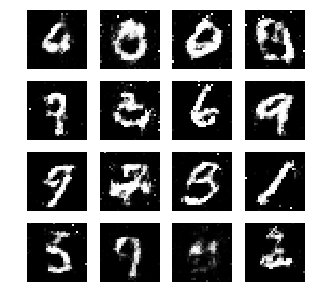

Step 40000


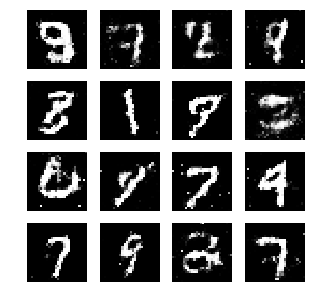

Step 41000


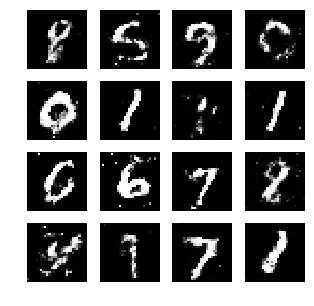

Step 42000


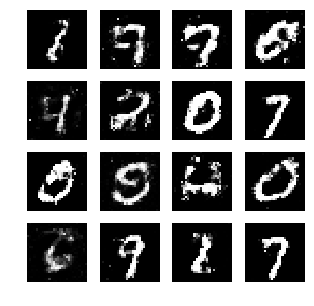

Step 43000


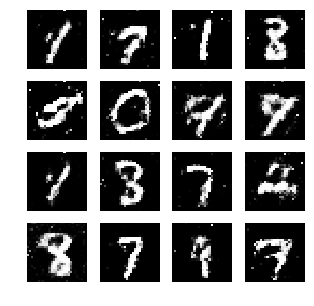

Step 44000


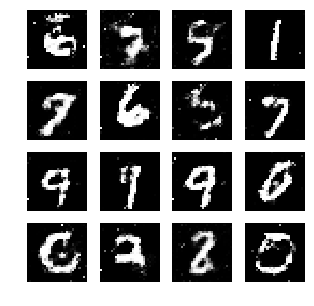

Step 45000


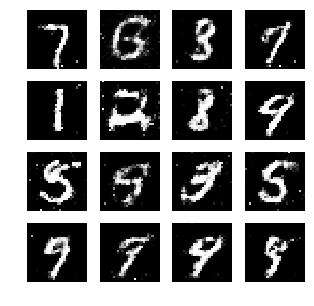

Step 46000


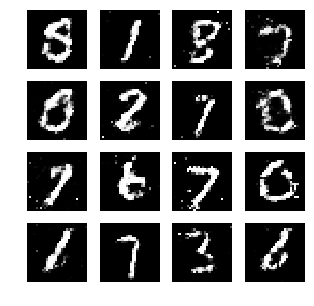

Step 47000


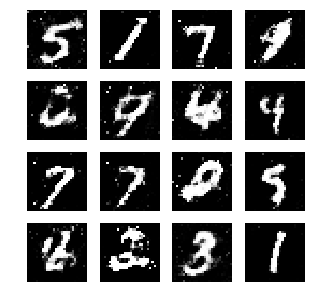

Step 48000


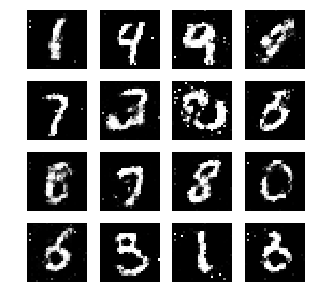

Step 49000


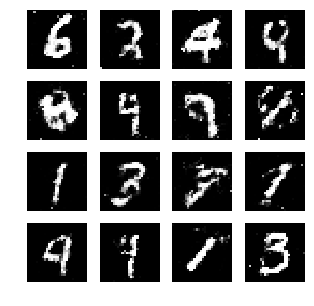

Step 50000


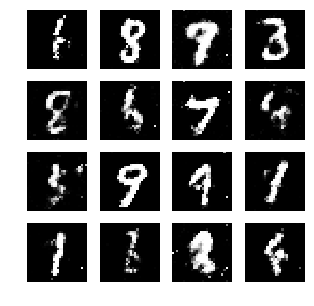

Step 51000


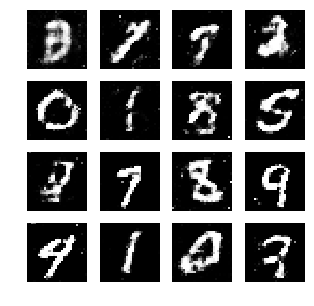

Step 52000


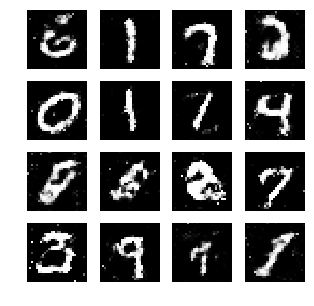

Step 53000


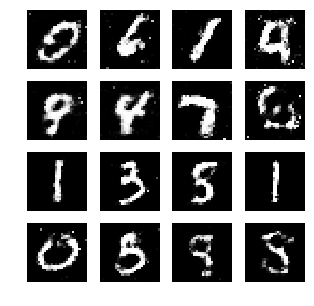

Step 54000


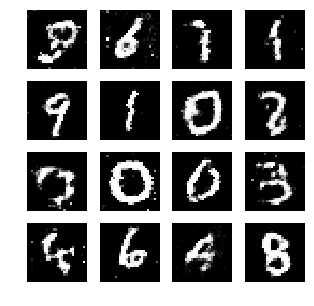

Step 55000


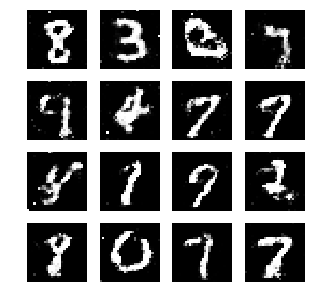

Step 56000


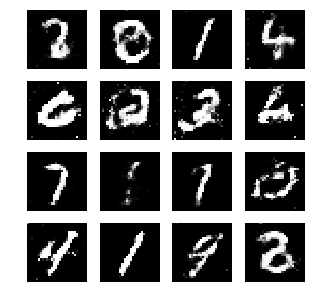

Step 57000


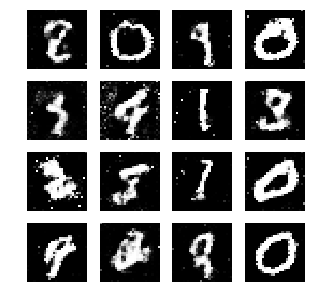

Step 58000


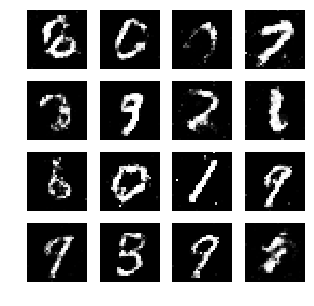

Step 59000


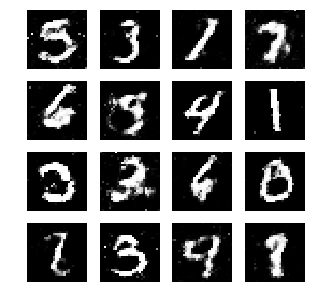

Step 60000


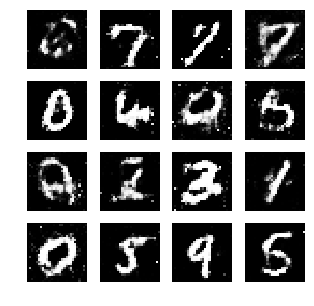

Step 61000


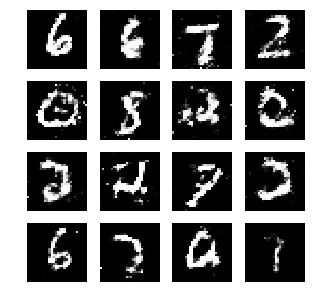

Step 62000


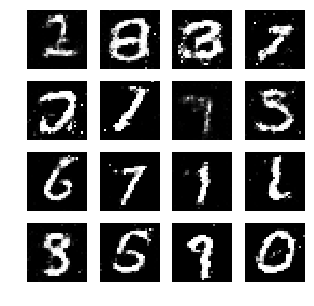

Step 63000


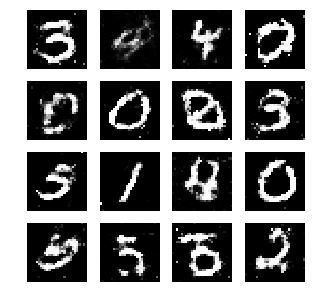

Step 64000


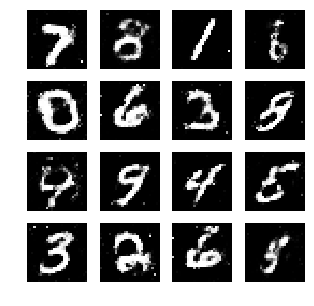

Step 65000


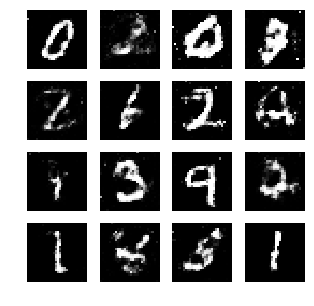

Step 66000


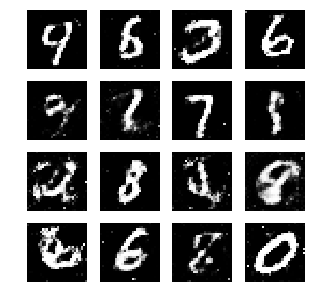

Step 67000


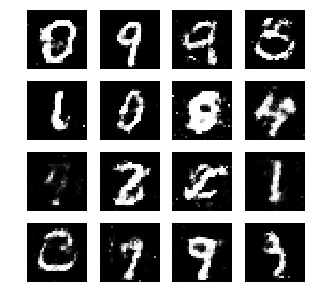

Step 68000


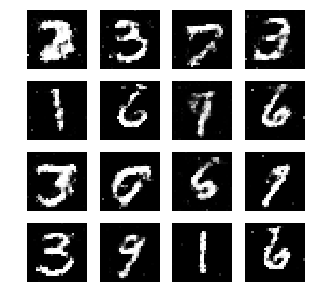

Step 69000


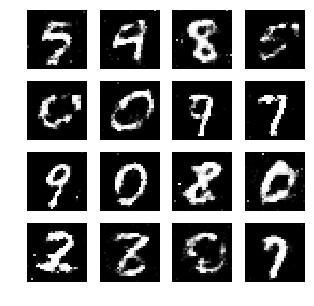

Step 70000


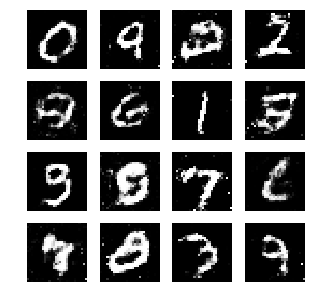

Step 71000


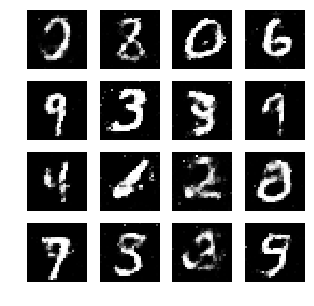

Step 72000


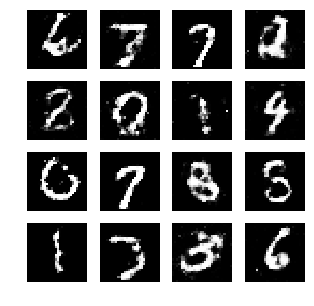

Step 73000


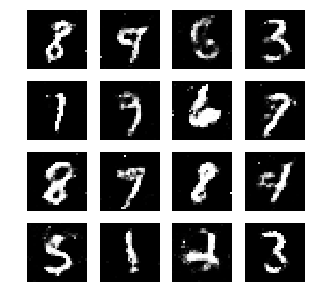

Step 74000


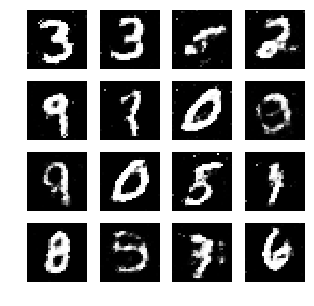

Step 75000


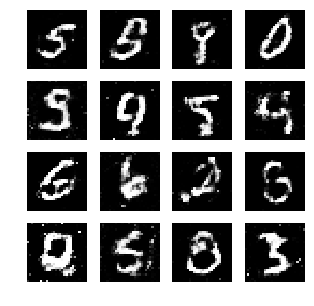

Step 76000


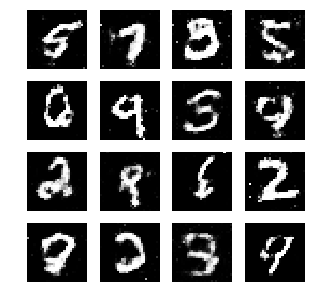

Step 77000


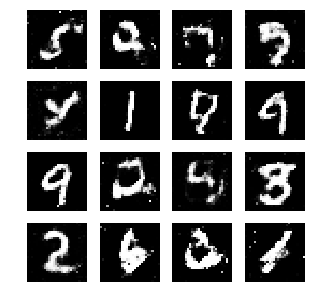

Step 78000


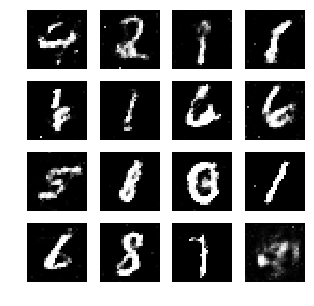

Step 79000


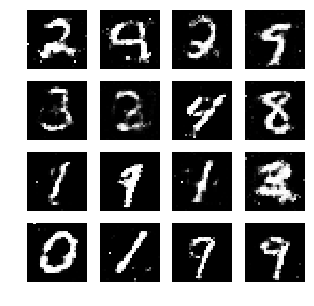

Step 80000


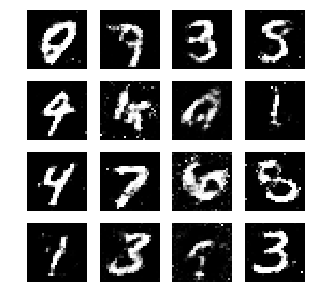

Step 81000


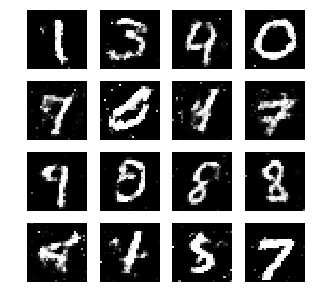

Step 82000


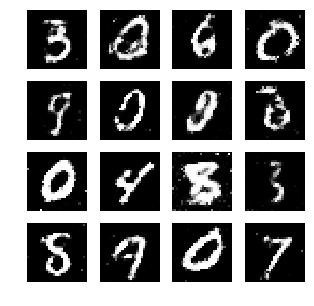

Step 83000


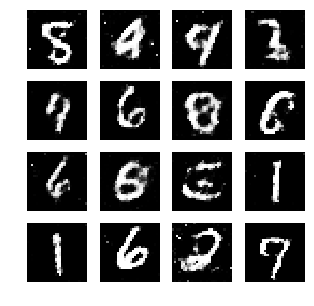

Step 84000


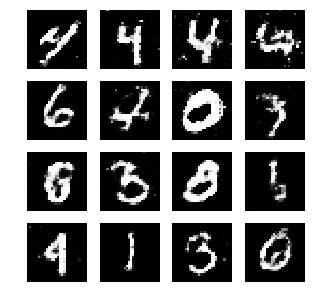

Step 85000


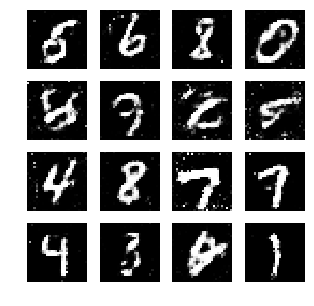

Step 86000


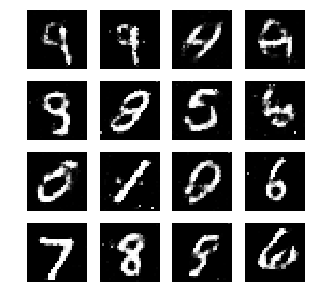

Step 87000


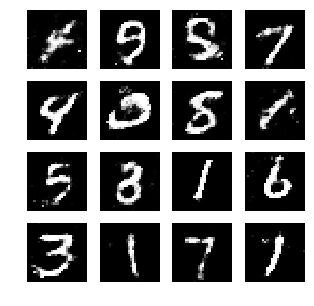

Step 88000


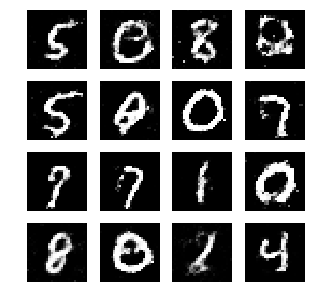

Step 89000


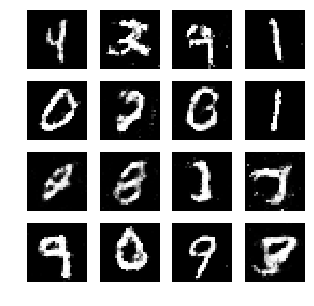

Step 90000


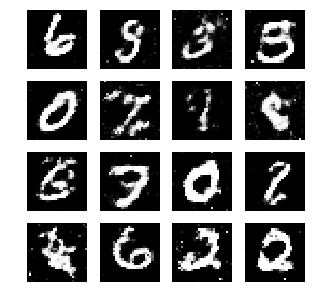

Step 91000


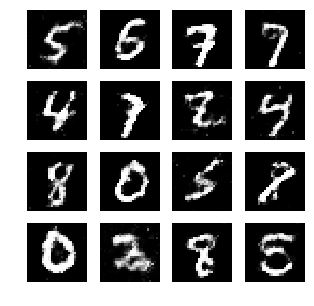

Step 92000


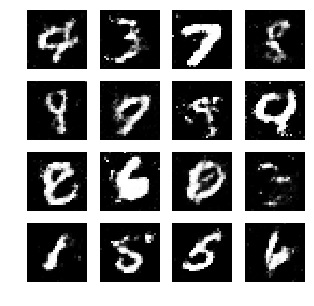

Step 93000


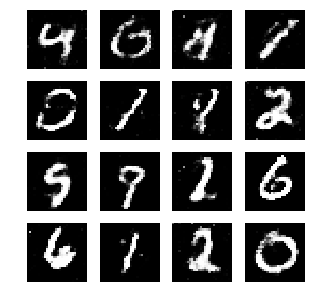

Step 94000


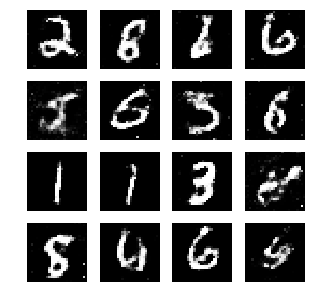

Step 95000


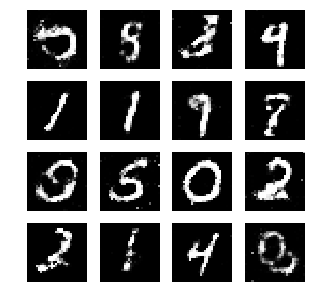

Step 96000


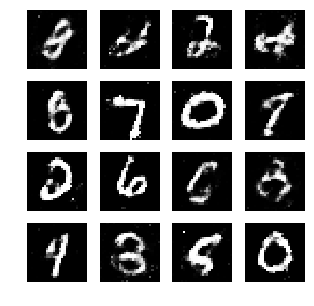

Step 97000


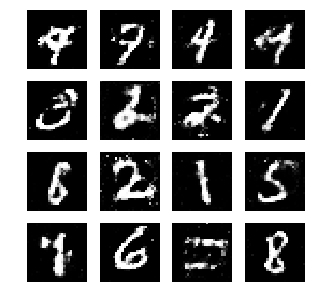

Step 98000


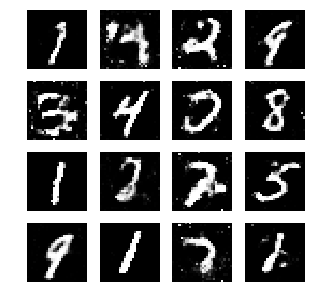

Step 99000


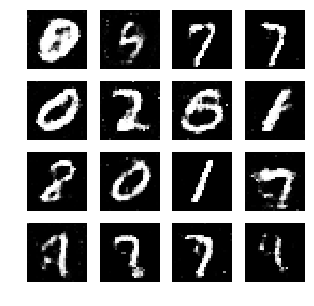

In [7]:
batch_size = 32
n_steps = 100000
plot_every = 1000

noise_input = np.random.uniform(-1, 1, size=[16, 100])
for step in range(n_steps):
    
    noise = np.random.uniform(-1, 1, size=[batch_size, 100])
    batch = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)].reshape(batch_size, 784)

    gen_output = generator.predict(noise)
    X = np.concatenate([batch, gen_output])

    y_D = np.zeros(2*batch_size)
    y_D[:batch_size] = 1

    discriminator.trainable = True
    loss_D = discriminator.train_on_batch(X, y_D)

    noise = np.random.uniform(-1, 1, size=[batch_size, 100])
    y_G = np.ones(batch_size)
    discriminator.trainable = False
    loss_G = gan.train_on_batch(noise, y_G)
    
    if step % plot_every == 0:
        print('Step {}'.format(step))
        plot_images(samples=noise_input.shape[0], step=(step+1))
        